# Лабораторная работа "Изучение библиотек обработки данных Pandas и PandaSQL."
## Цель работы

Изучение библиотек обработки данных Pandas и PandaSQL.

## Задание

Часть 1.

Выполните первое демонстрационное задание "demo assignment" под названием "Exploratory data analysis with Pandas" со страницы курса https://mlcourse.ai/assignments

Часть 2.

Выполните следующие запросы с использованием двух различных библиотек - Pandas и PandaSQL:

* один произвольный запрос на соединение двух наборов данных
* один произвольный запрос на группировку набора данных с использованием функций агрегирования

Сравните время выполнения каждого запроса в Pandas и PandaSQL.



#  Часть 1

##Описание Датасета:
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* salary: >50K,<=50K

## Загрузка данных

In [0]:
!pip install pandasql

  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandasql as ps
from datetime import datetime
import seaborn
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [0]:
data = pd.read_csv('/gdrive/My Drive/Colab Notebooks/ММО/lab2/data/adult.data.csv', sep=",")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Вопросы:

###1. How many men and women (sex feature) are represented in this dataset?

In [0]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

### 2. What is the average age (age feature) of women?

In [0]:
data.loc[data['sex']=='Female', 'age'].mean()

36.85823043357163

### 3. What is the proportion of German citizens (native-country feature)?

In [0]:
float((data['native-country'] == 'Germany').sum()) / data.shape[0]

0.004207487485028101

### 4-5. What are mean value and standard deviation of the age of those who recieve more than 50K per year (salary feature) and those who receive less than 50K per year?

In [0]:
ages1 = data.loc[data['salary'] == '>50K', 'age']
ages2 = data.loc[data['salary'] == '<=50K', 'age']
print("The average age of the rich: {0} +- {1} years, poor - {2} +- {3} years.".format(
    round(ages1.mean()), round(ages1.std(), 1),
    round(ages2.mean()), round(ages2.std(), 1)))

The average age of the rich: 44 +- 10.5 years, poor - 37 +- 14.0 years.


### 6. Is it true that people who receive more than 50k have at least high school education? (education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)

In [0]:
data.loc[data['salary'] == '>50K', 'education'].unique() # No

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th',
       '10th', '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

### 7. Display statistics of age for each race (race feature) and each gender. Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [0]:
for (race, sex), sub_df in data.groupby(['race', 'sex']):
    print("Race: {0}, sex: {1}".format(race, sex))
    print(sub_df['age'].describe())

Race: Amer-Indian-Eskimo, sex: Female
count    119.000000
mean      37.117647
std       13.114991
min       17.000000
25%       27.000000
50%       36.000000
75%       46.000000
max       80.000000
Name: age, dtype: float64
Race: Amer-Indian-Eskimo, sex: Male
count    192.000000
mean      37.208333
std       12.049563
min       17.000000
25%       28.000000
50%       35.000000
75%       45.000000
max       82.000000
Name: age, dtype: float64
Race: Asian-Pac-Islander, sex: Female
count    346.000000
mean      35.089595
std       12.300845
min       17.000000
25%       25.000000
50%       33.000000
75%       43.750000
max       75.000000
Name: age, dtype: float64
Race: Asian-Pac-Islander, sex: Male
count    693.000000
mean      39.073593
std       12.883944
min       18.000000
25%       29.000000
50%       37.000000
75%       46.000000
max       90.000000
Name: age, dtype: float64
Race: Black, sex: Female
count    1555.000000
mean       37.854019
std        12.637197
min        17.000000

### 8. Among whom the proportion of those who earn a lot(>50K) is more: among married or single men (marital-status feature)? Consider married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [0]:
data.loc[(data['sex'] == 'Male') &
     (data['marital-status'].isin(['Never-married', 
                                   'Separated', 
                                   'Divorced',
                                   'Widowed'])), 'salary'].value_counts()

<=50K    7552
>50K      697
Name: salary, dtype: int64

In [0]:
data.loc[(data['sex'] == 'Male') &
     (data['marital-status'].str.startswith('Married')), 'salary'].value_counts()

<=50K    7576
>50K     5965
Name: salary, dtype: int64

In [0]:
data['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

### 9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours and what is the percentage of those who earn a lot among them?

In [0]:
max_load = data['hours-per-week'].max()
print("Max time - {0} hours./week.".format(max_load))

num_workaholics = data[data['hours-per-week'] == max_load].shape[0]
print("Total number of such hard workers {0}".format(num_workaholics))

rich_share = float(data[(data['hours-per-week'] == max_load)
                 & (data['salary'] == '>50K')].shape[0]) / num_workaholics
print("Percentage of rich among them {0}%".format(int(100 * rich_share)))

Max time - 99 hours./week.
Total number of such hard workers 85
Percentage of rich among them 29%


### 10. Count the average time of work (hours-per-week) those who earning a little and a lot (salary) for each country (native-country).

In [0]:
pd.crosstab(data['native-country'], data['salary'], 
           values=data['hours-per-week'], aggfunc=np.mean).T

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
<=50K,40.164760,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,41.058824,39.139785,41.809524,39.360656,36.325,40.0,34.333333,39.142857,31.3,38.233333,41.44,40.947368,39.625,38.239437,41.000000,40.375,40.003279,36.09375,41.857143,35.068966,38.065693,38.166667,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
>50K,45.547945,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,50.750000,44.977273,50.625000,36.666667,42.750,NaN,60.000000,45.000000,50.0,46.475000,47.50,48.000000,45.400,41.100000,47.958333,40.000,46.575758,37.50000,NaN,40.000000,43.032787,39.000000,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.505369,39.200000,49.5


# Часть 2

Выполните следующие запросы с использованием двух различных библиотек - Pandas и PandaSQL:

* один произвольный запрос на соединение двух наборов данных
* один произвольный запрос на группировку набора данных с использованием функций агрегирования
Сравните время выполнения каждого запроса в Pandas и PandaSQL.



## Соединение 

Подготовка данных

In [0]:
jdata = data
jdata['id'] = jdata.index
jdatap1  = jdata.iloc[:, 0:4]
jdatap1['id'] = jdata.index
jdatap2 = jdata.iloc[:, 5:]

Выполнение

In [0]:
def example1_group_pandasql(dataset1, dataset2):
    join_query = '''
    SELECT *
    FROM dataset1 ds1
    JOIN dataset2 ds2 ON ds1.id = ds2.id
     '''
    return ps.sqldf(join_query, locals())

def example1_group_panda(dataset1, dataset2):
    return pd.merge(dataset1, dataset2, on='id')

## Группировка и агрегирование

In [0]:
def example2_group_pandasql(dataset):
    simple_query = '''
        SELECT 
            education,
            COUNT('hours-per-week') as avg_hours
        FROM dataset as df
        GROUP BY education
        '''
    return ps.sqldf(simple_query, locals())

def example2_group_panda(dataset):
    return data.groupby(["education"])["age"].count().to_frame()

## Тестирование

In [0]:
import time

def count_mean_time(func, params, N =5):
    total_time = 0
    for i in range(N):
        time1 = time.time()
        if len(params) == 1:
            tmp_df = func(params[0])
        elif len(params) == 2:
            tmp_df = func(params[0], params[1])
        time2 = time.time()
        total_time += (time2 - time1)
    return total_time/N

### Соединение 

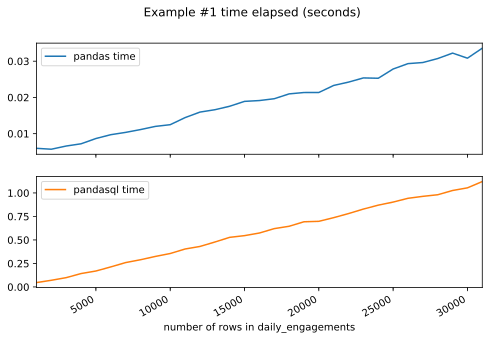

In [0]:
ex1_times  = []
for count in range(1000, 32000, 1000):
    pandasql_time = count_mean_time(example1_group_pandasql, [jdatap1[:count], jdatap2[:count]])
    pandas_time = count_mean_time(example1_group_panda, [jdatap1[:count], jdatap2[:count]])
    ex1_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})
ex1_times_df = pd.DataFrame(ex1_times)

ex1_times_df.columns = ['number of rows in daily_engagements', 'pandas time', 'pandasql time']
ex1_times_df = ex1_times_df.set_index('number of rows in daily_engagements')    
ax = ex1_times_df.plot(title = 'Example #1 time elapsed (seconds)', subplots = True)

### Группировка и агрегирование

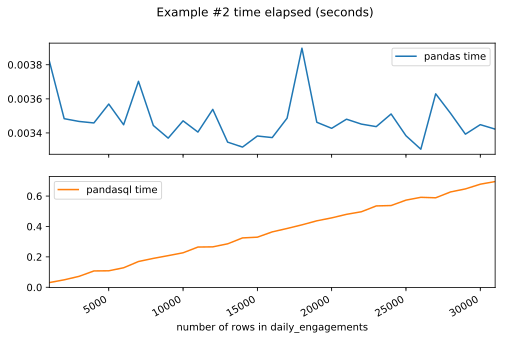

In [0]:
ex2_times  = []
for count in range(1000, 32000, 1000):
    pandasql_time = count_mean_time(example2_group_pandasql, [data[:count]])
    pandas_time = count_mean_time(example2_group_panda, [data[:count]])
    ex2_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})
ex2_times_df = pd.DataFrame(ex2_times)

ex2_times_df.columns = ['number of rows in daily_engagements', 'pandas time', 'pandasql time']
ex2_times_df = ex2_times_df.set_index('number of rows in daily_engagements')    
ax = ex2_times_df.plot(title = 'Example #2 time elapsed (seconds)', subplots = True)